In [1]:
import json
import numpy as np

# Define the file path to the JSON file
file_path = "../logs/scenarios/scenario_folder_0268.json"

# extract the id from the file path
id = file_path.split('_')[-1].split('.')[0]
print(f"Scenario ID: {id}")



# Load the JSON data from the file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the scenarios from the JSON data
scenarios = data['outputs']

# Initialize a dictionary to store the results
results = {}

# Initialize lists to store all probability values
all_probabilities = []

# Extract the data_folder from the file which is just called "data_folder" as key in the json
data_folder = data['data_folder']
print(f"Data Folder: {data_folder}")

# Iterate over each scenario in the JSON data
for scenario_name, scenario_data in scenarios.items():
    # Initialize lists to store aircraft IDs for each disruption type
    fully_disrupted_aircraft = []
    uncertain_disrupted_aircraft = []
    not_disrupted_aircraft = []
    
    # Get the list of disruptions for the current scenario
    disruptions = scenario_data['disruptions']['disruptions']
    
    # Process each disruption in the list
    for disruption in disruptions:
        aircraft_id = disruption['aircraft_id']
        probability = disruption['probability']
        
        # Add probability to list of all probabilities
        all_probabilities.append(probability)
        
        # Categorize the disruption based on the probability value
        if probability == 1.0:
            fully_disrupted_aircraft.append(aircraft_id)
        elif probability == 0.0:
            not_disrupted_aircraft.append(aircraft_id)
        elif 0 < probability < 1:
            uncertain_disrupted_aircraft.append(aircraft_id)
        else:
            # Handle unexpected probability values
            print(f"Unexpected probability value {probability} for aircraft {aircraft_id} in scenario {scenario_name}")
            
    # Calculate the counts for each disruption type
    num_fully_disrupted = len(fully_disrupted_aircraft)
    num_uncertain_disrupted = len(uncertain_disrupted_aircraft)
    num_not_disrupted = len(not_disrupted_aircraft)
    total_disruptions = num_fully_disrupted + num_uncertain_disrupted + num_not_disrupted
    
    # Store the results for the current scenario
    results[scenario_name] = {
        'fully_disrupted_aircraft': fully_disrupted_aircraft,
        'uncertain_disrupted_aircraft': uncertain_disrupted_aircraft,
        'not_disrupted_aircraft': not_disrupted_aircraft,
        'num_fully_disrupted': num_fully_disrupted,
        'num_uncertain_disrupted': num_uncertain_disrupted,
        'num_not_disrupted': num_not_disrupted,
        'total_disruptions': total_disruptions
    }


# Calculate average number of disruptions per type across all scenarios
total_scenarios = len(results)
avg_fully_disrupted = sum(metrics['num_fully_disrupted'] for metrics in results.values()) / total_scenarios
avg_uncertain_disrupted = sum(metrics['num_uncertain_disrupted'] for metrics in results.values()) / total_scenarios 
avg_not_disrupted = sum(metrics['num_not_disrupted'] for metrics in results.values()) / total_scenarios

print(f"\nAverage number of fully disrupted aircraft per scenario: {avg_fully_disrupted:.2f}")
print(f"Average number of uncertain disrupted aircraft per scenario: {avg_uncertain_disrupted:.2f}")
print(f"Average number of not disrupted aircraft per scenario: {avg_not_disrupted:.2f}")

# calculate the percentage of each disruption type
percentage_fully_disrupted = (avg_fully_disrupted / (avg_fully_disrupted + avg_uncertain_disrupted + avg_not_disrupted)) * 100
percentage_uncertain_disrupted = (avg_uncertain_disrupted / (avg_fully_disrupted + avg_uncertain_disrupted + avg_not_disrupted)) * 100
percentage_not_disrupted = (avg_not_disrupted / (avg_fully_disrupted + avg_uncertain_disrupted + avg_not_disrupted)) * 100

print(f"\nPercentage of fully disrupted aircraft: {percentage_fully_disrupted:.2f}%")
print(f"Percentage of uncertain disrupted aircraft: {percentage_uncertain_disrupted:.2f}%")
print(f"Percentage of not disrupted aircraft: {percentage_not_disrupted:.2f}%")


# of the uncertain disrupted aircraft, calculate the average probability and the standard deviation
uncertain_disrupted_probabilities = [scenario_data['disruptions']['disruptions'][i]['probability'] for i in range(len(uncertain_disrupted_aircraft))]
avg_uncertain_disrupted_probability = np.mean(uncertain_disrupted_probabilities)
std_uncertain_disrupted_probability = np.std(uncertain_disrupted_probabilities)

# uncertainties are the probabilities where 0 < probability < 1
uncertainties = [prob for prob in all_probabilities if 0 < prob < 1]
# Calculate probability statistics
prob_mean = np.mean(uncertainties)
prob_median = np.median(uncertainties)
prob_std = np.std(uncertainties)

print("\nProbability Statistics of uncertain disrupted aircraft:")
print(f"Mean probability: {prob_mean:.2f}")
print(f"Median probability: {prob_median:.2f}")
print(f"Standard deviation: {prob_std:.2f}")



Scenario ID: 0268
Data Folder: ../data/Training/3ac-100-high-uncertainty/

Average number of fully disrupted aircraft per scenario: 1.00
Average number of uncertain disrupted aircraft per scenario: 1.00
Average number of not disrupted aircraft per scenario: 1.00

Percentage of fully disrupted aircraft: 33.33%
Percentage of uncertain disrupted aircraft: 33.33%
Percentage of not disrupted aircraft: 33.33%

Probability Statistics of uncertain disrupted aircraft:
Mean probability: 0.76
Median probability: 0.75
Standard deviation: 0.14


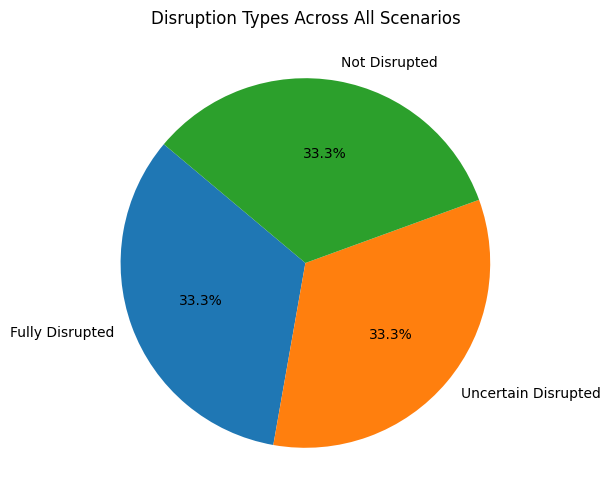

In [2]:
import matplotlib.pyplot as plt

# Data for disruption types
disruption_counts = [
    sum(metrics['num_fully_disrupted'] for metrics in results.values()),
    sum(metrics['num_uncertain_disrupted'] for metrics in results.values()),
    sum(metrics['num_not_disrupted'] for metrics in results.values())
]
disruption_labels = ['Fully Disrupted', 'Uncertain Disrupted', 'Not Disrupted']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(disruption_counts, labels=disruption_labels, autopct='%1.1f%%', startangle=140)
plt.title('Disruption Types Across All Scenarios')
plt.show()


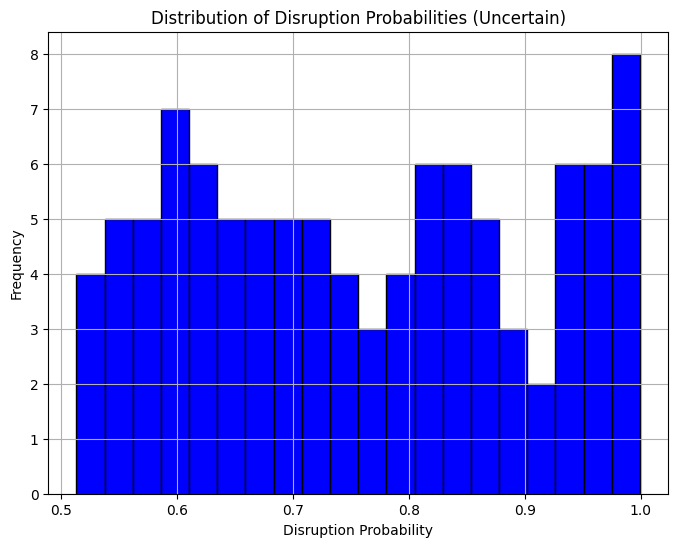

In [3]:
# Plot
plt.figure(figsize=(8, 6))
plt.hist(uncertainties, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Disruption Probabilities (Uncertain)')
plt.xlabel('Disruption Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [4]:
import numpy as np

# For each scenario, calculate the disruption length metrics
for scenario_name, scenario_data in scenarios.items():
    # Initialize dictionaries to store unavailability periods per disruption type
    disruption_lengths = {
        'fully_disrupted': [],
        'uncertain_disrupted': [],
        'not_disrupted': []
    }
    
    # Get the list of disruptions for the current scenario
    disruptions = scenario_data['disruptions']['disruptions']
    
    # Process each disruption
    for disruption in disruptions:
        aircraft_id = disruption['aircraft_id']
        probability = disruption['probability']
        unavailability_period = disruption['unavailability_period_minutes']
        
        # Categorize and collect unavailability periods
        if probability == 1.0:
            disruption_lengths['fully_disrupted'].append(unavailability_period)
        elif 0.0 < probability < 1.0:
            disruption_lengths['uncertain_disrupted'].append(unavailability_period)
        elif probability == 0.0:
            disruption_lengths['not_disrupted'].append(unavailability_period)
        else:
            print(f"Unexpected probability value {probability} for aircraft {aircraft_id} in scenario {scenario_name}")
    
    # # Calculate and print the metrics for each disruption type
    # for disruption_type, lengths in disruption_lengths.items():
    #     if lengths:
    #         mean_length = np.mean(lengths)
    #         median_length = np.median(lengths)
    #         std_dev_length = np.std(lengths)
    #         min_length = np.min(lengths)
    #         max_length = np.max(lengths)
            
    #         print(f"Scenario: {scenario_name} - {disruption_type.replace('_', ' ').title()}")
    #         print(f"Average Length (Mean): {mean_length:.2f} minutes")
    #         print(f"Average Length (Median): {median_length:.2f} minutes")
    #         print(f"Standard Deviation: {std_dev_length:.2f} minutes")
    #         print(f"Minimum Length: {min_length} minutes")
    #         print(f"Maximum Length: {max_length} minutes")
    #         print("\n")
    #     else:
    #         print(f"Scenario: {scenario_name} - {disruption_type.replace('_', ' ').title()}")
    #         print("No disruptions in this category.\n")


# Per disruption type, calculate the average length of the disruptions
# Initialize dictionaries to store all lengths across scenarios
all_disruption_lengths = {
    'fully_disrupted': [],
    'uncertain_disrupted': [],
    'not_disrupted': []
}

# Collect lengths from all scenarios
for scenario_name, scenario_data in scenarios.items():
    disruptions = scenario_data['disruptions']['disruptions']
    
    for disruption in disruptions:
        probability = disruption['probability']
        unavailability_period = disruption['unavailability_period_minutes']
        
        if probability == 1.0:
            all_disruption_lengths['fully_disrupted'].append(unavailability_period)
        elif 0.0 < probability < 1.0:
            all_disruption_lengths['uncertain_disrupted'].append(unavailability_period)
        elif probability == 0.0:
            all_disruption_lengths['not_disrupted'].append(unavailability_period)

# Calculate and print overall statistics for each disruption type
print("Overall Statistics Across All Scenarios:")
print(f"Scenario ID: {id}")
print("-" * 40)
for disruption_type, lengths in all_disruption_lengths.items():
    if lengths:
        mean_length = np.mean(lengths)
        median_length = np.median(lengths)
        std_dev_length = np.std(lengths)
        min_length = np.min(lengths)
        max_length = np.max(lengths)
        
        print(f"\n{disruption_type.replace('_', ' ').title()}:")
        print(f"Number of disruptions: {len(lengths)}")
        print(f"Average Length (Mean): {mean_length:.2f} minutes")
        print(f"Average Length (Median): {median_length:.2f} minutes") 
        print(f"Standard Deviation: {std_dev_length:.2f} minutes")
        print(f"Minimum Length: {min_length} minutes")
        print(f"Maximum Length: {max_length} minutes")
    else:
        print(f"\n{disruption_type.replace('_', ' ').title()}:")
        print("No disruptions in this category.")


Overall Statistics Across All Scenarios:
Scenario ID: 0268
----------------------------------------

Fully Disrupted:
Number of disruptions: 100
Average Length (Mean): 581.43 minutes
Average Length (Median): 562.50 minutes
Standard Deviation: 260.86 minutes
Minimum Length: 123 minutes
Maximum Length: 1015 minutes

Uncertain Disrupted:
Number of disruptions: 100
Average Length (Mean): 581.59 minutes
Average Length (Median): 578.00 minutes
Standard Deviation: 256.07 minutes
Minimum Length: 142 minutes
Maximum Length: 1017 minutes

Not Disrupted:
Number of disruptions: 100
Average Length (Mean): 524.63 minutes
Average Length (Median): 514.50 minutes
Standard Deviation: 258.64 minutes
Minimum Length: 123 minutes
Maximum Length: 1010 minutes


In [5]:
# For each scenario, calculate the disruption timing metrics
for scenario_name, scenario_data in scenarios.items():
    # Initialize dictionaries to store start times per disruption type
    disruption_start_times = {
        'fully_disrupted': [],
        'uncertain_disrupted': [],
        'not_disrupted': []
    }
    
    # Get the list of disruptions for the current scenario
    disruptions = scenario_data['disruptions']['disruptions']
    
    # Process each disruption
    for disruption in disruptions:
        aircraft_id = disruption['aircraft_id']
        probability = disruption['probability']
        start_time = disruption['delta_start_minutes']
        
        # Categorize and collect start times
        if probability == 1.0:
            disruption_start_times['fully_disrupted'].append(start_time)
        elif 0.0 < probability < 1.0:
            disruption_start_times['uncertain_disrupted'].append(start_time)
        elif probability == 0.0:
            disruption_start_times['not_disrupted'].append(start_time)
        else:
            print(f"Unexpected probability value {probability} for aircraft {aircraft_id} in scenario {scenario_name}")

# Calculate and print the metrics for each disruption type
for disruption_type, start_times in disruption_start_times.items():
    if start_times:
        mean_start_time = np.mean(start_times)
        median_start_time = np.median(start_times)
        std_dev_start_time = np.std(start_times)



In [6]:
# Initialize dictionaries to store start times for all scenarios globally
global_disruption_start_times = {
    'fully_disrupted': [],
    'uncertain_disrupted': [],
    'not_disrupted': []
}

# Aggregate start times from all scenarios
for scenario_name, scenario_data in scenarios.items():
    disruptions = scenario_data['disruptions']['disruptions']
    
    for disruption in disruptions:
        aircraft_id = disruption['aircraft_id']
        probability = disruption['probability']
        start_time = disruption['delta_start_minutes']
        
        # Categorize and collect start times globally
        if probability == 1.0:
            global_disruption_start_times['fully_disrupted'].append(start_time)
        elif 0.0 < probability < 1.0:
            global_disruption_start_times['uncertain_disrupted'].append(start_time)
        elif probability == 0.0:
            global_disruption_start_times['not_disrupted'].append(start_time)
        else:
            print(f"Unexpected probability value {probability} for aircraft {aircraft_id} in scenario {scenario_name}")

# Calculate and print global metrics for each disruption type
for disruption_type, start_times in global_disruption_start_times.items():
    if start_times:
        mean_start_time = np.mean(start_times)
        median_start_time = np.median(start_times)
        std_dev_start_time = np.std(start_times)
        earliest_start_time = np.min(start_times)
        latest_start_time = np.max(start_times)
        
        print(f"Disruption start times - {disruption_type.replace('_', ' ').title()}")
        print(f"Average Start Time (Mean): {mean_start_time:.2f} minutes")
        print(f"Average Start Time (Median): {median_start_time:.2f} minutes")
        print(f"Standard Deviation: {std_dev_start_time:.2f} minutes")
        print(f"Earliest Start Time: {earliest_start_time} minutes")
        print(f"Latest Start Time: {latest_start_time} minutes")
        print("\n")
    else:
        print(f"Disruption start times - {disruption_type.replace('_', ' ').title()}")
        print("No disruptions in this category.\n")


Disruption start times - Fully Disrupted
Average Start Time (Mean): 134.11 minutes
Average Start Time (Median): 132.50 minutes
Standard Deviation: 9.13 minutes
Earliest Start Time: 120 minutes
Latest Start Time: 150 minutes


Disruption start times - Uncertain Disrupted
Average Start Time (Mean): 134.34 minutes
Average Start Time (Median): 134.00 minutes
Standard Deviation: 9.27 minutes
Earliest Start Time: 120 minutes
Latest Start Time: 150 minutes


Disruption start times - Not Disrupted
Average Start Time (Mean): 135.01 minutes
Average Start Time (Median): 135.00 minutes
Standard Deviation: 8.12 minutes
Earliest Start Time: 120 minutes
Latest Start Time: 150 minutes




In [7]:
# Initialize dictionaries to store end times (relative to recovery period start and end) for all scenarios globally
global_disruption_end_times_start_relative = {
    'fully_disrupted': [],
    'uncertain_disrupted': [],
    'not_disrupted': []
}

global_disruption_end_times_end_relative = {
    'fully_disrupted': [],
    'uncertain_disrupted': [],
    'not_disrupted': []
}

# Aggregate end times from all scenarios
for scenario_name, scenario_data in scenarios.items():
    disruptions = scenario_data['disruptions']['disruptions']
    
    for disruption in disruptions:
        aircraft_id = disruption['aircraft_id']
        probability = disruption['probability']
        start_time = disruption['delta_start_minutes']
        unavailability_period = disruption['unavailability_period_minutes']
        
        # Calculate end times
        end_time_start_relative = start_time + unavailability_period
        end_time_end_relative = unavailability_period  # Assuming end relative to recovery period is unavailability period itself
        
        # Categorize and collect end times globally
        if probability == 1.0:
            global_disruption_end_times_start_relative['fully_disrupted'].append(end_time_start_relative)
            global_disruption_end_times_end_relative['fully_disrupted'].append(end_time_end_relative)
        elif 0.0 < probability < 1.0:
            global_disruption_end_times_start_relative['uncertain_disrupted'].append(end_time_start_relative)
            global_disruption_end_times_end_relative['uncertain_disrupted'].append(end_time_end_relative)
        elif probability == 0.0:
            global_disruption_end_times_start_relative['not_disrupted'].append(end_time_start_relative)
            global_disruption_end_times_end_relative['not_disrupted'].append(end_time_end_relative)
        else:
            print(f"Unexpected probability value {probability} for aircraft {aircraft_id} in scenario {scenario_name}")

# Calculate and print global metrics for end times (relative to start and end of recovery period)
for disruption_type in global_disruption_end_times_start_relative.keys():
    # Metrics for end times relative to recovery period start
    end_times_start = global_disruption_end_times_start_relative[disruption_type]
    if end_times_start:
        mean_end_start = np.mean(end_times_start)
        median_end_start = np.median(end_times_start)
        std_dev_end_start = np.std(end_times_start)
        min_end_start = np.min(end_times_start)
        max_end_start = np.max(end_times_start)
        
        print(f"Disruption end times  - {disruption_type.replace('_', ' ').title()} (End Time Relative to Start of Recovery)")
        print(f"Average End Time (Mean): {mean_end_start:.2f} minutes")
        print(f"Median End Time: {median_end_start:.2f} minutes")
        print(f"Standard Deviation: {std_dev_end_start:.2f} minutes")
        print(f"Earliest End Time: {min_end_start} minutes")
        print(f"Latest End Time: {max_end_start} minutes")
        print("\n")
    else:
        print(f"Disruption end times  - {disruption_type.replace('_', ' ').title()} (End Time Relative to Start of Recovery)")
        print("No disruptions in this category.\n")
    
    # Metrics for end times relative to recovery period end
    end_times_end = global_disruption_end_times_end_relative[disruption_type]
    if end_times_end:
        mean_end_end = np.mean(end_times_end)
        median_end_end = np.median(end_times_end)
        std_dev_end_end = np.std(end_times_end)
        min_end_end = np.min(end_times_end)
        max_end_end = np.max(end_times_end)
        
        print(f"Disruption end times  - {disruption_type.replace('_', ' ').title()} (End Time Relative to End of Recovery)")
        print(f"Average End Time (Mean): {mean_end_end:.2f} minutes")
        print(f"Median End Time: {median_end_end:.2f} minutes")
        print(f"Standard Deviation: {std_dev_end_end:.2f} minutes")
        print(f"Earliest End Time: {min_end_end} minutes")
        print(f"Latest End Time: {max_end_end} minutes")
        print("\n")
    else:
        print(f"Disruption end times  - {disruption_type.replace('_', ' ').title()} (End Time Relative to End of Recovery)")
        print("No disruptions in this category.\n")


Disruption end times  - Fully Disrupted (End Time Relative to Start of Recovery)
Average End Time (Mean): 715.54 minutes
Median End Time: 696.00 minutes
Standard Deviation: 260.27 minutes
Earliest End Time: 256 minutes
Latest End Time: 1162 minutes


Disruption end times  - Fully Disrupted (End Time Relative to End of Recovery)
Average End Time (Mean): 581.43 minutes
Median End Time: 562.50 minutes
Standard Deviation: 260.86 minutes
Earliest End Time: 123 minutes
Latest End Time: 1015 minutes


Disruption end times  - Uncertain Disrupted (End Time Relative to Start of Recovery)
Average End Time (Mean): 715.93 minutes
Median End Time: 710.00 minutes
Standard Deviation: 256.95 minutes
Earliest End Time: 262 minutes
Latest End Time: 1163 minutes


Disruption end times  - Uncertain Disrupted (End Time Relative to End of Recovery)
Average End Time (Mean): 581.59 minutes
Median End Time: 578.00 minutes
Standard Deviation: 256.07 minutes
Earliest End Time: 142 minutes
Latest End Time: 1017 mi

/var/folders/m6/gwyqzldd12bg_s3mrl40tp6r0000gn/T/ipykernel_27748/3377092997.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(length_data, labels=labels, patch_artist=True)


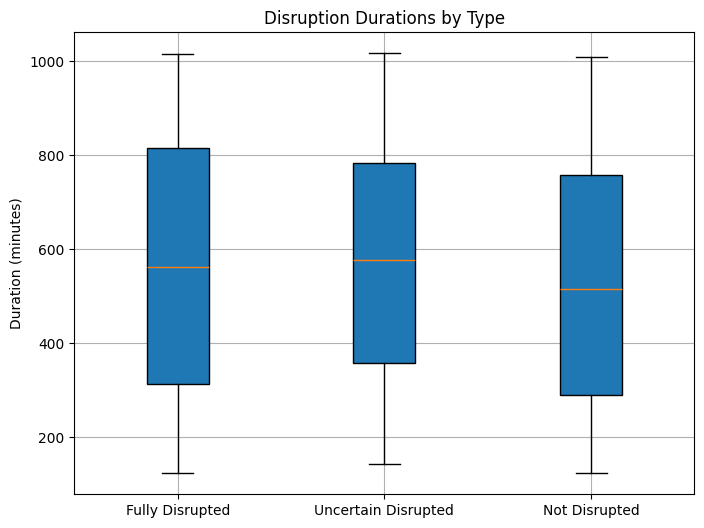

In [8]:
# Data preparation
length_data = [
    all_disruption_lengths['fully_disrupted'],
    all_disruption_lengths['uncertain_disrupted'],
    all_disruption_lengths['not_disrupted']
]
labels = ['Fully Disrupted', 'Uncertain Disrupted', 'Not Disrupted']

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot(length_data, labels=labels, patch_artist=True)
plt.title('Disruption Durations by Type')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()


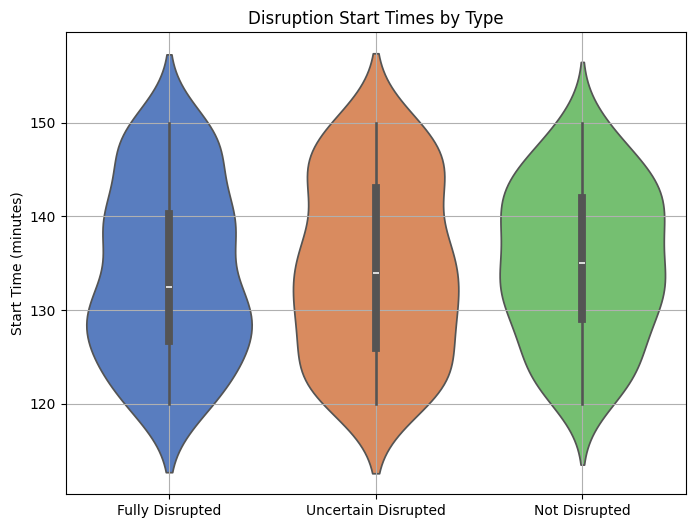

In [9]:
import seaborn as sns

# Data preparation
start_time_data = [
    global_disruption_start_times['fully_disrupted'],
    global_disruption_start_times['uncertain_disrupted'],
    global_disruption_start_times['not_disrupted']
]

# Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=start_time_data, palette='muted')
plt.xticks(ticks=[0, 1, 2], labels=['Fully Disrupted', 'Uncertain Disrupted', 'Not Disrupted'])
plt.title('Disruption Start Times by Type')
plt.ylabel('Start Time (minutes)')
plt.grid(True)
plt.show()


In [10]:
# Initialize dictionaries to store flight overlap counts globally and per scenario
global_flight_impact_metrics = {
    'fully_disrupted': 0,
    'uncertain_disrupted': 0,
    'not_disrupted': 0
}

# Track per-scenario counts for standard deviation calculation
scenario_flight_counts = {
    'fully_disrupted': [],
    'uncertain_disrupted': [], 
    'not_disrupted': []
}

# Aggregate flight impact metrics from all scenarios
for scenario_name, scenario_data in scenarios.items():
    disruptions = scenario_data['disruptions']['disruptions']
    flights = scenario_data['flights']  # Flights data for the current scenario
    
    # Track counts for this scenario
    scenario_counts = {
        'fully_disrupted': 0,
        'uncertain_disrupted': 0,
        'not_disrupted': 0
    }

    for disruption in disruptions:
        aircraft_id = disruption['aircraft_id']
        probability = disruption['probability']
        disruption_start = disruption['delta_start_minutes']
        disruption_end = disruption_start + disruption['unavailability_period_minutes']

        # Find flights assigned to the disrupted aircraft
        overlapping_flights = 0
        for flight_id, flight_data in flights.items():
            if flight_data['Aircraft'] == aircraft_id:
                # Parse flight departure and arrival times into minutes
                dep_time_parts = [int(x) for x in flight_data['DepTime'].split(":")]
                arr_time_parts = [int(x) for x in flight_data['ArrTime'].split(":")]
                dep_time_minutes = dep_time_parts[0] * 60 + dep_time_parts[1]
                arr_time_minutes = arr_time_parts[0] * 60 + arr_time_parts[1]

                # Check if the flight overlaps with the disruption
                if (dep_time_minutes < disruption_end and arr_time_minutes > disruption_start):
                    overlapping_flights += 1

        # Increment the global and scenario counts based on disruption type
        if probability == 1.0:
            global_flight_impact_metrics['fully_disrupted'] += overlapping_flights
            scenario_counts['fully_disrupted'] += overlapping_flights
        elif 0.0 < probability < 1.0:
            global_flight_impact_metrics['uncertain_disrupted'] += overlapping_flights
            scenario_counts['uncertain_disrupted'] += overlapping_flights
        elif probability == 0.0:
            global_flight_impact_metrics['not_disrupted'] += overlapping_flights
            scenario_counts['not_disrupted'] += overlapping_flights
        else:
            print(f"Unexpected probability value {probability} for aircraft {aircraft_id} in scenario {scenario_name}")
    
    # Add this scenario's counts to the list for standard deviation calculation
    for disruption_type in scenario_counts:
        scenario_flight_counts[disruption_type].append(scenario_counts[disruption_type])

print(f"\nFlights impacted across all scenarios:")
# Print the flight impact metrics globally
for disruption_type in global_flight_impact_metrics:
    total_flights = global_flight_impact_metrics[disruption_type]
    avg_flights = total_flights / total_scenarios
    std_dev = np.std(scenario_flight_counts[disruption_type])
    
    print(f"    {disruption_type.replace('_', ' ').title()}")
    print(f"        Total Flights Overlapping with Disruption: {total_flights}")
    print(f"        Average number of flights overlapping with disruption: {avg_flights:.2f}")
    print(f"        Standard Deviation of overlapping flights: {std_dev:.2f}")
    print(f"        Maximum: {np.max(scenario_flight_counts[disruption_type])} | Minimum: {np.min(scenario_flight_counts[disruption_type])}\n")



Flights impacted across all scenarios:
    Fully Disrupted
        Total Flights Overlapping with Disruption: 163
        Average number of flights overlapping with disruption: 1.63
        Standard Deviation of overlapping flights: 1.07
        Maximum: 4 | Minimum: 0

    Uncertain Disrupted
        Total Flights Overlapping with Disruption: 152
        Average number of flights overlapping with disruption: 1.52
        Standard Deviation of overlapping flights: 1.10
        Maximum: 4 | Minimum: 0

    Not Disrupted
        Total Flights Overlapping with Disruption: 152
        Average number of flights overlapping with disruption: 1.52
        Standard Deviation of overlapping flights: 1.17
        Maximum: 4 | Minimum: 0



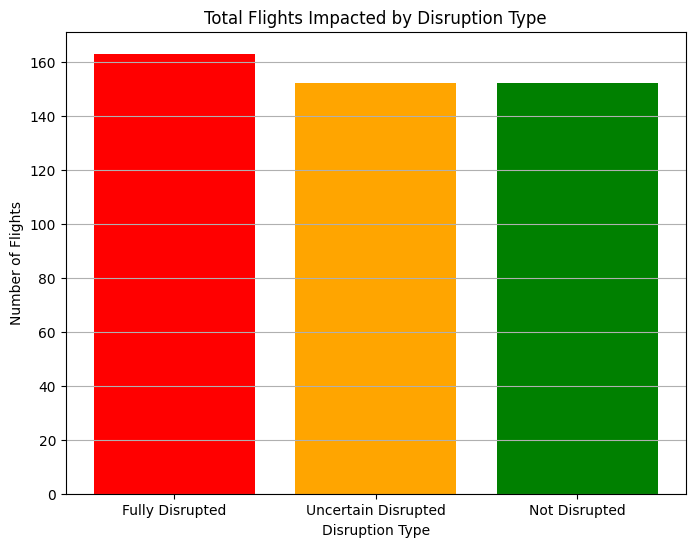

In [11]:
# Data for flight impact
impact_counts = [
    global_flight_impact_metrics['fully_disrupted'],
    global_flight_impact_metrics['uncertain_disrupted'],
    global_flight_impact_metrics['not_disrupted']
]
impact_labels = ['Fully Disrupted', 'Uncertain Disrupted', 'Not Disrupted']

# Plot
plt.figure(figsize=(8, 6))
plt.bar(impact_labels, impact_counts, color=['red', 'orange', 'green'])
plt.title('Total Flights Impacted by Disruption Type')
plt.ylabel('Number of Flights')
plt.xlabel('Disruption Type')
plt.grid(axis='y')
plt.show()


In [12]:
# Initialize dictionaries to store swapping possibilities globally
global_swapping_possibilities = {
    'fully_disrupted': [],
    'uncertain_disrupted': [],
    'not_disrupted': []
}

# Aggregate swapping possibilities from all scenarios
for scenario_name, scenario_data in scenarios.items():
    # print(f"\nProcessing scenario {scenario_name}...")
    flights = scenario_data['flights']  # Flights data for the current scenario
    aircraft_ids = scenario_data['aircraft_ids']  # All aircraft in the scenario

    # Build a schedule map for all flights
    aircraft_schedule = {aircraft: [] for aircraft in aircraft_ids}
    for flight_id, flight_data in flights.items():
        dep_time_parts = [int(x) for x in flight_data['DepTime'].split(":")]
        arr_time_parts = [int(x) for x in flight_data['ArrTime'].split(":")]
        dep_time_minutes = dep_time_parts[0] * 60 + dep_time_parts[1]
        arr_time_minutes = arr_time_parts[0] * 60 + arr_time_parts[1]
        aircraft_schedule[flight_data['Aircraft']].append((dep_time_minutes, arr_time_minutes))

    # Process each disruption
    for flight_id, flight_data in flights.items():
        aircraft_id = flight_data['Aircraft']
        dep_time_parts = [int(x) for x in flight_data['DepTime'].split(":")]
        arr_time_parts = [int(x) for x in flight_data['ArrTime'].split(":")]
        dep_time_minutes = dep_time_parts[0] * 60 + dep_time_parts[1]
        arr_time_minutes = arr_time_parts[0] * 60 + arr_time_parts[1]

        # print(f"  Checking Flight {flight_id}: {flight_data['Orig']} -> {flight_data['Dest']} ({flight_data['DepTime']} - {flight_data['ArrTime']}) operated by {aircraft_id}")
        
        # Calculate swapping possibilities for the flight
        swapping_options = 0
        for candidate_aircraft, schedule in aircraft_schedule.items():
            if candidate_aircraft != aircraft_id:
                # Check if the candidate aircraft has no conflicting flights during this time
                conflict = any(
                    not (arr_time_minutes <= flight[0] or dep_time_minutes >= flight[1])
                    for flight in schedule
                )
                if not conflict:
                    swapping_options += 1

        # print(f"    Number of possible aircraft swaps: {swapping_options}")

        # Store swapping options based on disruption type
        swapping_probability = next(
            (d['probability'] for d in scenario_data['disruptions']['disruptions']
             if d['aircraft_id'] == aircraft_id),
            None
        )
        if swapping_probability is not None:
            if swapping_probability == 1.0:
                global_swapping_possibilities['fully_disrupted'].append(swapping_options)
            elif 0.0 < swapping_probability < 1.0:
                global_swapping_possibilities['uncertain_disrupted'].append(swapping_options)
            elif swapping_probability == 0.0:
                global_swapping_possibilities['not_disrupted'].append(swapping_options)
            else:
                print(f"Unexpected probability value {swapping_probability} for aircraft {aircraft_id} in scenario {scenario_name}")

# Print global swapping possibilities metrics
for disruption_type, swapping_counts in global_swapping_possibilities.items():
    if swapping_counts:
        mean_swapping = np.mean(swapping_counts)
        median_swapping = np.median(swapping_counts)
        std_dev_swapping = np.std(swapping_counts)
        min_swapping = np.min(swapping_counts)
        max_swapping = np.max(swapping_counts)

        print(f"Swapping Possibilities - {disruption_type.replace('_', ' ').title()}")
        print(f"Average Swapping Options (Mean): {mean_swapping:.2f}")
        print(f"Median Swapping Options: {median_swapping:.2f}")
        print(f"Standard Deviation: {std_dev_swapping:.2f}")
        print(f"Minimum Swapping Options: {min_swapping}")
        print(f"Maximum Swapping Options: {max_swapping}\n")
    else:
        print(f"Swapping Possibilities - {disruption_type.replace('_', ' ').title()}")  
        print("No disruptions in this category.\n")


Swapping Possibilities - Fully Disrupted
Average Swapping Options (Mean): 0.01
Median Swapping Options: 0.00
Standard Deviation: 0.11
Minimum Swapping Options: 0
Maximum Swapping Options: 1

Swapping Possibilities - Uncertain Disrupted
Average Swapping Options (Mean): 0.04
Median Swapping Options: 0.00
Standard Deviation: 0.24
Minimum Swapping Options: 0
Maximum Swapping Options: 2

Swapping Possibilities - Not Disrupted
Average Swapping Options (Mean): 0.05
Median Swapping Options: 0.00
Standard Deviation: 0.26
Minimum Swapping Options: 0
Maximum Swapping Options: 2



/var/folders/m6/gwyqzldd12bg_s3mrl40tp6r0000gn/T/ipykernel_27748/1226110279.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(swapping_data, labels=labels, patch_artist=True)


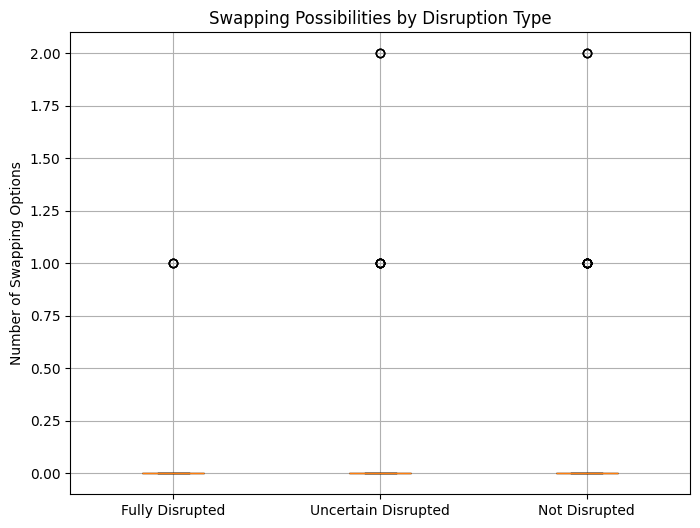

In [13]:
# Data preparation
swapping_data = [
    global_swapping_possibilities['fully_disrupted'],
    global_swapping_possibilities['uncertain_disrupted'],
    global_swapping_possibilities['not_disrupted']
]
labels = ['Fully Disrupted', 'Uncertain Disrupted', 'Not Disrupted']

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot(swapping_data, labels=labels, patch_artist=True)
plt.title('Swapping Possibilities by Disruption Type')
plt.ylabel('Number of Swapping Options')
plt.grid(True)
plt.show()
